In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
import pandas as pd
customers_df=pd.read_csv("customers.csv")

In [7]:
customers_df.head(5)

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

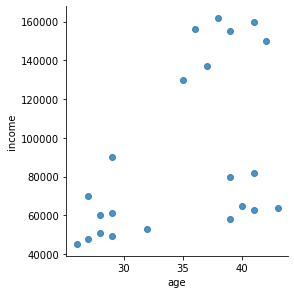

In [9]:
sn.lmplot("age","income",data=customers_df, fit_reg=False,size =4)
# plt.title ("fig1: customers segments based on income and age")

In [10]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [11]:
customers_df["clusterid"] = clusters.labels_

In [12]:
customers_df[0:5]

,age,income,clusterid
0,27,70000,2
1,29,90000,2
2,29,61000,1
3,28,60000,1
4,42,150000,0


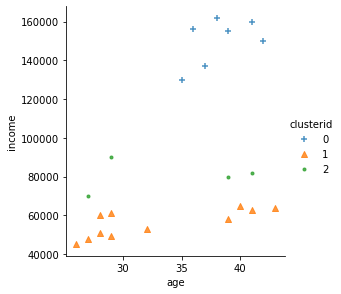

In [15]:
markers = ['+','^','.']
sn.lmplot("age","income",
data=customers_df,
hue="clusterid",
fit_reg=False,
markers=markers,
size=4);

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(
customers_df[["age","income"]])
scaled_customers_df[0:5]

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653]])

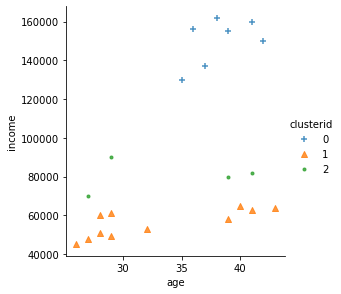

In [23]:
from sklearn.cluster import KMeans
clusters_new =KMeans (3, random_state=42)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"]= clusters_new.labels_

markers = ['+','^','.']
sn.lmplot("age","income",
data=customers_df,
hue="clusterid",
fit_reg=False,
markers=markers,
size=4);

In [24]:
clusters.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

In [25]:
customers_df.groupby('clusterid')['age',
'income'].agg(["mean",
'std']).reset_index()

clusterid        age                   income              
                  mean       std           mean           std
0         0  38.285714  2.563480  150000.000000  12069.244660
1         1  32.909091  6.456850   56136.363636   7071.389217
2         2  34.000000  7.023769   80500.000000   8225.975120